# PCA Assignment
1. Download the dataset faces.zip from Blackboard. It contains 2429 faces of
size 19 x 19 pixels each, and background.zip , containing background samples
somehow resembling faces. If there are any unreadable images, discard them.


#### Import dependencies

In [157]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image

#### Data loading functions

In [158]:
def vectorize_pgm(file_path):
    return np.asarray(Image.open(file_path)).ravel()

def load_images(directory):
    files = []
    for file in os.listdir(directory):
        files.append((vectorize_pgm(os.path.join(directory, file))))
    return np.asarray(files)

def get_faces():
    return load_images('data/faces/')

def get_backgrounds():
    return load_images('data/backgrounds/')

In [159]:
def PCA(data):
    # standardize data
    data = data.astype(np.float)
    data -= np.mean(data, axis=0)
    values, vectors = np.linalg.eig(data.T@data)
    vectors = vectors[np.abs(values).argsort()[::-1]]
    return values, vectors
PCA(get_faces())

(array([1.22897690e+09, 2.38852263e+08, 1.36824895e+08, 6.95423498e+07,
        6.13950315e+07, 5.30990337e+07, 4.64278833e+07, 3.28583667e+07,
        2.71383438e+07, 2.46235392e+07, 2.24561501e+07, 1.89628516e+07,
        1.72240746e+07, 1.55034975e+07, 1.33861535e+07, 1.29454494e+07,
        1.19800433e+07, 1.16833077e+07, 1.09886865e+07, 1.08181776e+07,
        1.00114426e+07, 9.13713275e+06, 8.79313834e+06, 7.87226050e+06,
        7.02099979e+06, 6.80367722e+06, 6.05196394e+06, 5.88548611e+06,
        5.51680246e+06, 5.23262713e+06, 4.92524659e+06, 4.80678370e+06,
        4.66150680e+06, 4.37875567e+06, 4.20978535e+06, 4.00540117e+06,
        3.85708323e+06, 3.62150362e+06, 3.52885404e+06, 3.47489774e+06,
        3.23504837e+06, 3.14635754e+06, 3.04865433e+06, 3.00751107e+06,
        2.90393865e+06, 2.75909494e+06, 2.68624906e+06, 2.63787489e+06,
        2.51173093e+06, 2.29312701e+06, 2.27739504e+06, 2.19933905e+06,
        2.16004051e+06, 2.07004202e+06, 2.02599772e+06, 1.870779

a) Perform Principal Component Analysis on the faces. Discard the two largest
eigenvalue and plot the graph of the remaining eigenvalues sorted in decreasing
order. (1 point)

In [160]:
faces = get_faces()

In [161]:
values_faces, vectors_faces = PCA(faces)

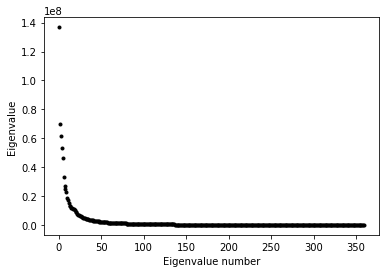

In [162]:
plt.scatter(np.arange(1,values_faces.size-1), values_faces[2:], marker='.', color="black")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue")
plt.show()

b) Plot a graph of the coordinates of the faces projected to the 2D plane generated
by the eigenvectors corresponding to the largest and second largest eigenvalues.
(1 point)

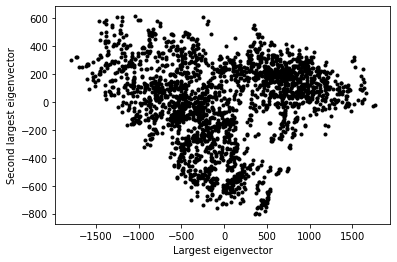

In [163]:
data = faces.astype(np.float)
data -= np.mean(faces, axis=0)
result = vectors_faces.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='black')
plt.xlabel("Largest eigenvector")
plt.ylabel("Second largest eigenvector")
plt.show()


c) On the same graph, display the coordinates of the projections from b) using one
color (black) and the projections of the background patches on the same two
eigenvectors using another color (e.g. red or light gray). Be sure to subtract the
mean of the faces and project to the eigenvectors of the faces. (1 point)

In [164]:
backgrounds = get_backgrounds()

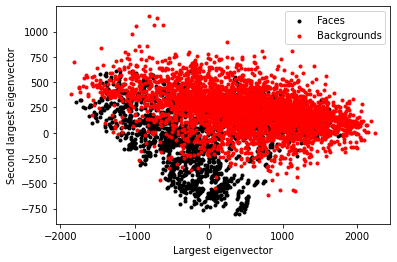

In [165]:
plt.xlabel("Largest eigenvector")
plt.ylabel("Second largest eigenvector")

data = faces.astype(np.float)
data = data - np.mean(faces, axis=0)
result = vectors_faces.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='black')

data = backgrounds.astype(np.float)
data = data - np.mean(faces, axis=0)
result = vectors_faces.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='red')

plt.legend(["Faces", "Backgrounds"])
plt.show()

d) Compute the distances of the faces and the background points to the plane from
b). On the same graph, plot the computed distances (on the y-axis) vs the coordinates of the
projections on the eigenvector of the largest eigenvalue (on the xaxis) for the faces and
background patches using two different colors. (2 points)

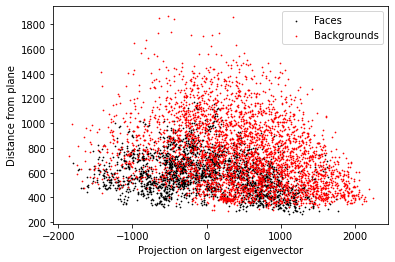

In [166]:
def calc_distance_from_plane(X, eigenvectors):
    X = X.astype(np.float)
    X = X - np.mean(faces, axis=0)
    v1hat = eigenvectors[:,0]
    v2hat = eigenvectors[:,1]
    result = np.zeros( X.shape[0], dtype=X.dtype )
    for i in range( X.shape[0] ):
        result[i] = np.linalg.norm(X[i] - X[i] @ v1hat * v1hat - X[i] @ v2hat * v2hat)
    return result


def print_scatter(data, color, eigenvalue):
    distances = calc_distance_from_plane(np.copy(data), vectors_faces)
    data = data.astype(np.float)
    data = data - np.mean(faces, axis=0)
    result = vectors_faces.T.dot(data.T)
    plt.scatter(result[eigenvalue], distances, marker='.', color=color, s=2)

print_scatter(np.copy(faces), 'black',0)
print_scatter(np.copy(backgrounds), 'red',0)

plt.xlabel('Projection on largest eigenvector')
plt.ylabel('Distance from plane')
plt.legend(["Faces", "Backgrounds"])
plt.show()

e) Repeat point d) displaying the computed distances (on y) vs the coordinates of
the projections on the eigenvector of the second largest eigenvalue(on x). (2
points)

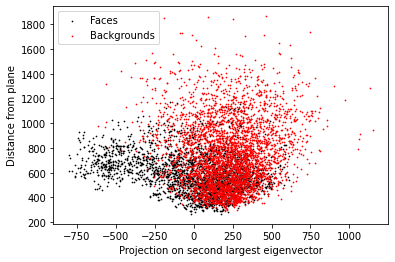

In [167]:
print_scatter(np.copy(faces), 'black',1)
print_scatter(np.copy(backgrounds), 'red',1)

plt.xlabel('Projection on second largest eigenvector')
plt.ylabel('Distance from plane')
plt.legend(["Faces", "Backgrounds"])
plt.show()